In [4]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.compose import TransformedTargetRegressor

In [5]:
Data=pd.read_csv('1000_y_data.csv')

In [6]:
features = Data.columns[1:23]
target = Data.columns[23:50]
Chest_deflection = Data.columns[23]
pelvis = Data.columns[24]
Rib12 = Data.columns[37]
col = Data.columns
cv = KFold(n_splits=10)

In [7]:
X = Data[features]
y = Data[Rib12]

In [6]:
y.skew()

3.2152437226056434

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
# power = PowerTransformer(method='yeo-johnson', standardize=True)
power = PowerTransformer(method='box-cox', standardize=True)

# scaler = MaxAbsScaler()
# scaler = StandardScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = QuantileTransformer()
# scaler = MinMaxScaler()
# scaler = Normalizer(norm = 'l2')
# transformer = FunctionTransformer(np.log2, validate = True)

r = Data['rib12'].values
# ax=r.reshape(-1, 1)
# yu = scaler.fit_transform(ax)
# yu = power.fit_transform(ax)
# yu= (Data[Rib1])**(1/8)
yu = np.log(Data[Rib12])
# yu = transformer.transform(ax)
df=pd.DataFrame(yu)
df.skew()
yu.skew()

0.639302734900737

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


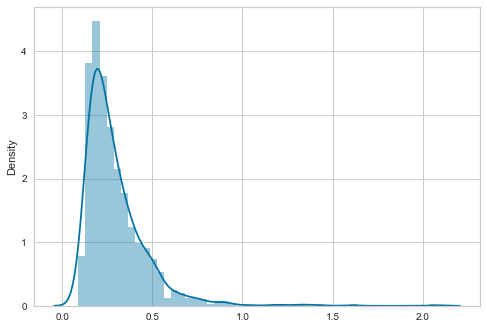

<Figure size 576x396 with 0 Axes>

In [8]:
sns.distplot(r,hist=True)
fig = plt.figure()

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


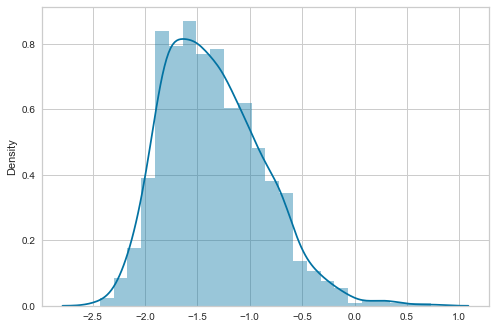

<Figure size 576x396 with 0 Axes>

In [9]:
# plt.figure(figsize=(8, 6))
# sns.set_theme(style="ticks")
# ax1=sns.kdeplot(yu, color='r', label='actual')
# # sns.kdeplot(ytestunk,color='b',label='predicted', ax=ax1)
# plt.legend()
# plt.grid(linestyle = '--')
# plt.title("Raw data (Y) and Predicted KDE plot ")
# plt.show()
sns.distplot(df,hist=True)
fig = plt.figure()



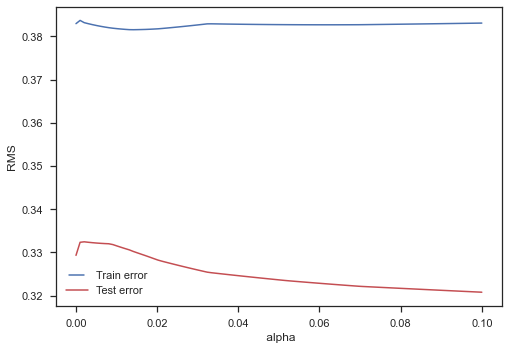

In [153]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
learning_rates =  np.linspace(1e-08,0.1,100,endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = Lasso(alpha=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' alpha')
plt.show()

## max_iterations

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

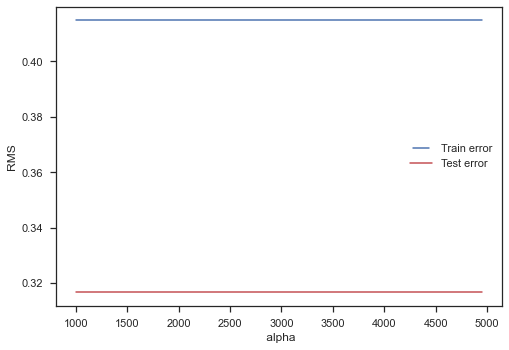

In [154]:
n_estimators = np.arange(1000,5000,50)
train_results = []
test_results = []
for eta in n_estimators:
    model = Lasso(max_iter=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' alpha')
plt.show()

## Random Hyperparameter Grid
### Randomized search 

In [146]:
X = Data[features]
y = Data[Rib12]

In [8]:
# Rib12
alpha = np.linspace(1e-08, 0.1, 100, endpoint=True)
max_iter= np.arange(200,5000,100)
selection=['cyclic','random']

random_grid = {"alpha" :alpha,
               "max_iter":max_iter,
               "selection":selection}
               
        

In [9]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
y_t=np.log(y)
rf = Lasso()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y_t)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 877 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.3s finished


RandomizedSearchCV(cv=10, estimator=Lasso(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-08, 1.01011091e-03, 2.02021182e-03, 3.03031273e-03,
       4.04041364e-03, 5.05051455e-03, 6.06061545e-03, 7.07071636e-03,
       8.08081727e-03, 9.09091818e-03, 1.01010191e-02, 1.11111200e-02,
       1.21212209e-02, 1.31313218e-02, 1.41414227e-02, 1.51515236e-02,
       1.61616245...
       9.69696973e-02, 9.79797982e-02, 9.89898991e-02, 1.00000000e-01]),
                                        'max_iter': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
       1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
       2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400,
       3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500,
       4600, 4700, 4800, 4900]),
                                        'selection': ['cyclic', 'random']},
                   random_state=42, verbose=2)

In [10]:
rf_random.best_params_

{'selection': 'cyclic', 'max_iter': 200, 'alpha': 0.01111112}

In [11]:
#Rib12 
X = Data[features]
y = Data[Rib12]
mode=Lasso(alpha=0.01111112, selection='random', warm_start=True,max_iter = 200)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

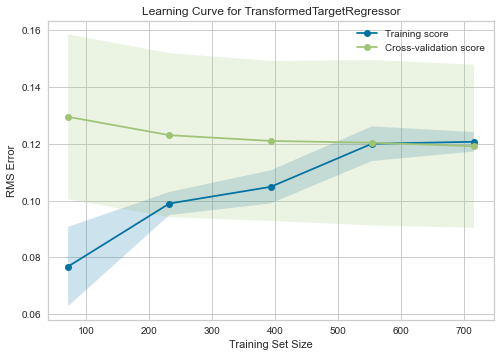

In [12]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [13]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.092581

Root Mean squared error: 0.131792

Root Mean squared error: 0.085305

Root Mean squared error: 0.106323

Root Mean squared error: 0.091172

Root Mean squared error: 0.149468

Root Mean squared error: 0.118399

Root Mean squared error: 0.183199

Root Mean squared error: 0.127201

Root Mean squared error: 0.105740

error COV--->0    1.308405
dtype: float64  error mean --->0    0.058217
Name: mean, dtype: float64  error std --->0    0.076171
Name: std, dtype: float64


In [14]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.483342
dtype: float64  error mean --->0    0.067665
Name: mean, dtype: float64  error std --->0    0.100371
Name: std, dtype: float64


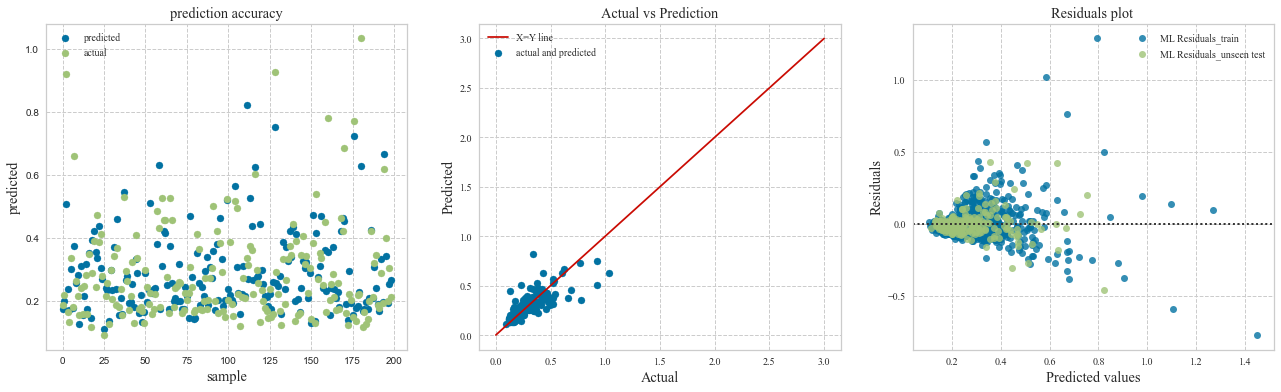

In [15]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# Grid search

In [141]:
# # Hyperparameter values of Random Forest to input to the GridSearchCV

#Rib1
alpha = np.linspace(1e-04, 1e-02, 20, endpoint=True)
max_iter= np.arange(1700,5000,100)
selection=['cyclic','random']

random_grid = {"alpha" :alpha,
               "max_iter":max_iter,
               "selection":selection}
               

In [142]:
features = Data.columns[1:23]
target = Data.columns[23:50]
Chest_deflection = Data.columns[23]
pelvis = Data.columns[24]
Rib1 = Data.columns[26]
col = Data.columns
cv = KFold(n_splits=10)
X = Data[features]
y = Data[Rib1]

In [143]:
yt=np.log(y)
rf = Lasso()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,yt)

Fitting 10 folds for each of 1320 candidates, totalling 13200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 2240 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 4504 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 7424 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 10984 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 13200 out of 13200 | elapsed:   42.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.0001    , 0.00062105, 0.00114211, 0.00166316, 0.00218421,
       0.00270526, 0.00322632, 0.00374737, 0.00426842, 0.00478947,
       0.00531053, 0.00583158, 0.00635263, 0.00687368, 0.00739474,
       0.00791579, 0.00843684, 0.00895789, 0.00947895, 0.01      ]),
                         'max_iter': array([1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700,
       2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800,
       3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900]),
                         'selection': ['cyclic', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [144]:
reg.best_params_

{'alpha': 0.0027052631578947366, 'max_iter': 2800, 'selection': 'random'}

In [145]:
## Rib1
mode=Lasso(alpha=0.0027052631578947366, selection='random', warm_start=True,max_iter = 2800)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)


C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

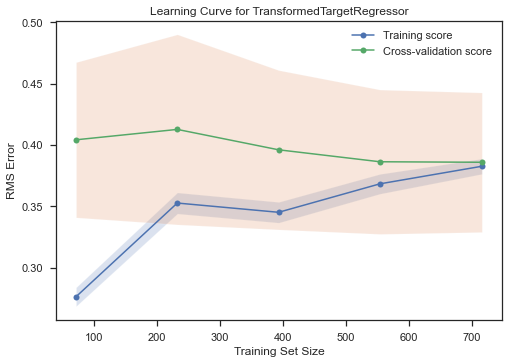

In [146]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
kf=cv
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [147]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.356862

Root Mean squared error: 0.348855

Root Mean squared error: 0.430238

Root Mean squared error: 0.346019

Root Mean squared error: 0.304707

Root Mean squared error: 0.304278

Root Mean squared error: 0.429493

Root Mean squared error: 0.460396

Root Mean squared error: 0.433065

Root Mean squared error: 0.444761

error COV--->0    1.421194
dtype: float64  error mean --->0    0.19211
Name: mean, dtype: float64  error std --->0    0.273025
Name: std, dtype: float64


# train score

In [148]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.660322
dtype: float64  error mean --->0    0.197706
Name: mean, dtype: float64  error std --->0    0.328256
Name: std, dtype: float64


In [149]:
# define model evaluation method
cv = KFold(n_splits=10,random_state=1)
# evaluate model
scores = cross_val_score(mod, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Mean MAE: 0.386 (0.057)
